In [1]:
%matplotlib inline

from statsbombpy import sb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm, rcParams
import os
from mplsoccer.pitch import Pitch

from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
from mplsoccer.utils import FontManager
import seaborn as sns
from matplotlib.colors import to_rgba, LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as path_effects

from PIL import Image

from urllib.request import urlopen
from highlight_text import HighlightText, ax_text, fig_text
import requests
from io import BytesIO
import cmasher as cmr

In [39]:
parser = Sbopen()
match_files = [3835337, 3835329, 3835322]
df = pd.concat([parser.event(file)[0] for file in match_files])

In [40]:
teamName = "Denmark Women's"

In [49]:
pitchColor = "#7FB069"
figColor = "#7FB069"
linesColor = "black"
hteamColor = "#E32219"
ateamColor = "#003581"

In [47]:
teamShots = df[df["team_name"]== teamName]
teamShots = teamShots[teamShots["type_name"]== "Shot"]
teamShots = teamShots[['team_name', 'player_name', 'minute', 'second', "x", "y", 'shot_statsbomb_xg', "type_name", "outcome_name"]]

In [56]:
teamShots.head()

,team_name,player_name,minute,second,x,y,shot_statsbomb_xg,type_name,outcome_name
670,Denmark Women's,Pernille Mosegaard Harder,12,57,98.6,47.2,0.253417,Shot,Off T
756,Denmark Women's,Pernille Mosegaard Harder,15,10,112.6,55.4,0.034467,Shot,Saved
927,Denmark Women's,Kathrine Møller Kühl,18,30,110.0,31.5,0.086696,Shot,Blocked
2165,Denmark Women's,Kathrine Møller Kühl,49,20,109.4,48.0,0.063547,Shot,Blocked
3078,Denmark Women's,Pernille Mosegaard Harder,71,38,94.9,44.9,0.040767,Shot,Off T


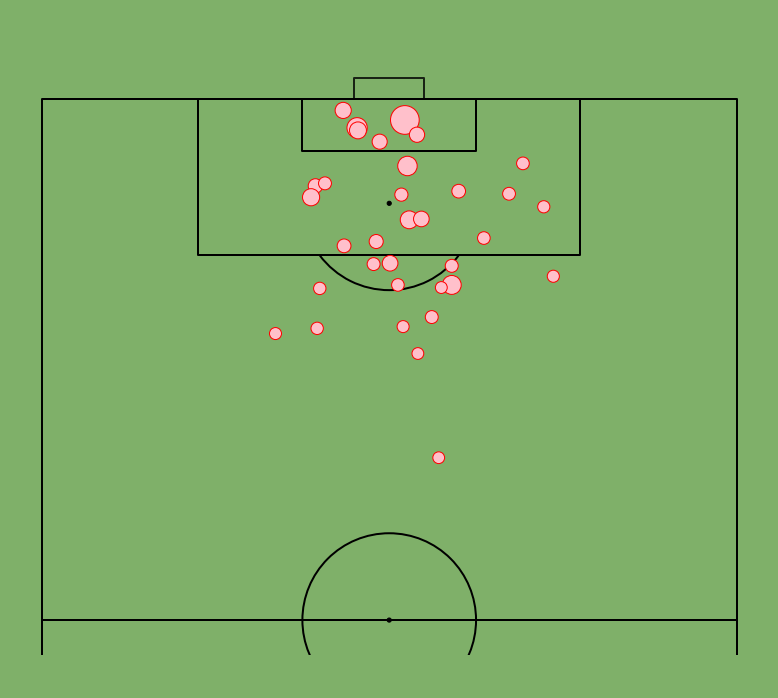

In [51]:
pitch = VerticalPitch(pitch_type='statsbomb', half=True, goal_type="box", goal_alpha=0.8,
                      pitch_color=pitchColor, line_color=linesColor)

fig,axs= pitch.grid(figheight=10, title_height=0.08, endnote_space=0, 
                    axis=False,title_space=0, grid_height=0.82, endnote_height=0.05)

fig.set_facecolor(figColor)

scatter_teamShots = pitch.scatter(teamShots.x, teamShots.y, s=(teamShots.shot_statsbomb_xg * 900) + 130, 
                              c='pink', edgecolors= "red", marker='o', 
                              alpha = 1, ax=axs['pitch'])